In [23]:
from reader import load_dataframe
import pandas as pd
import os
import glob
from datetime import date
import matplotlib.pyplot as plt
import numpy as np

In [24]:
df = load_dataframe()
df.head()

,city,bikeid,starttime,stoptime,tripduration,start station name,start station latitude,start station longitude,end station name,end station latitude,end station longitude,usertype,birth year,gender,age
0,New York,29590,2018-01-01 00:01:46,2018-01-01 00:03:58,132,Grove St PATH,40.719586,-74.043117,Newark Ave,40.721525,-74.046305,Subscriber,1964.0,Male,54.0
1,New York,29613,2018-01-01 01:27:17,2018-01-01 01:36:38,560,Marin Light Rail,40.714584,-74.042817,Brunswick & 6th,40.726012,-74.050389,Subscriber,1989.0,Female,29.0
2,New York,31940,2018-01-01 01:29:03,2018-01-01 01:33:58,294,Sip Ave,40.730743,-74.063784,Baldwin at Montgomery,40.723659,-74.064194,Subscriber,1994.0,Male,24.0
3,New York,31949,2018-01-01 01:59:32,2018-01-01 02:02:49,197,Newark Ave,40.721525,-74.046305,Monmouth and 6th,40.725685,-74.048790,Subscriber,1964.0,Male,54.0
4,New York,31929,2018-01-01 02:06:18,2018-01-01 02:21:50,932,Exchange Place,40.716247,-74.033459,Newport Pkwy,40.728745,-74.032108,Subscriber,1992.0,Male,26.0


In [35]:
# How many observations and variables are there
df.shape

(631373, 15)

In [36]:
# Variable names and data types
df.dtypes

city                        object
bikeid                       int64
starttime                   object
stoptime                    object
tripduration                 int64
start station name          object
start station latitude     float64
start station longitude    float64
end station name            object
end station latitude       float64
end station longitude      float64
usertype                    object
birth year                 float64
gender                      object
age                        float64
dtype: object

In [38]:
# Summary of the numerical variables
df.describe()

,bikeid,tripduration,start station latitude,start station longitude,end station latitude,end station longitude,birth year,age
count,631373.000000,6.313730e+05,631373.000000,631373.000000,631373.000000,631373.000000,587914.000000,587914.000000
mean,6687.202867,8.332047e+02,38.247734,-114.471648,38.247778,-114.471008,1981.639522,36.360478
std,10334.012105,3.752489e+03,1.096867,17.846863,1.096648,17.846793,10.553349,10.553349
min,11.000000,6.100000e+01,37.312854,-122.444293,37.312854,-122.444293,1887.000000,16.000000
25%,1396.000000,3.140000e+02,37.773717,-122.408445,37.774520,-122.406432,1976.000000,29.000000
50%,2659.000000,5.080000e+02,37.787290,-122.394430,37.787522,-122.394430,1984.000000,34.000000
75%,3706.000000,8.180000e+02,37.827757,-122.258764,37.824931,-122.258801,1989.000000,42.000000
max,33682.000000,1.037896e+06,40.748716,-74.032108,40.813358,-73.956461,2002.000000,131.000000


In [26]:
#Replace NaN values
df.fillna('Other')

,city,bikeid,starttime,stoptime,tripduration,start station name,start station latitude,start station longitude,end station name,end station latitude,end station longitude,usertype,birth year,gender,age
0,New York,29590,2018-01-01 00:01:46,2018-01-01 00:03:58,132,Grove St PATH,40.719586,-74.043117,Newark Ave,40.721525,-74.046305,Subscriber,1964,Male,54
1,New York,29613,2018-01-01 01:27:17,2018-01-01 01:36:38,560,Marin Light Rail,40.714584,-74.042817,Brunswick & 6th,40.726012,-74.050389,Subscriber,1989,Female,29
2,New York,31940,2018-01-01 01:29:03,2018-01-01 01:33:58,294,Sip Ave,40.730743,-74.063784,Baldwin at Montgomery,40.723659,-74.064194,Subscriber,1994,Male,24
3,New York,31949,2018-01-01 01:59:32,2018-01-01 02:02:49,197,Newark Ave,40.721525,-74.046305,Monmouth and 6th,40.725685,-74.048790,Subscriber,1964,Male,54
4,New York,31929,2018-01-01 02:06:18,2018-01-01 02:21:50,932,Exchange Place,40.716247,-74.033459,Newport Pkwy,40.728745,-74.032108,Subscriber,1992,Male,26
5,New York,31920,2018-01-01 02:10:57,2018-01-01 02:13:20,142,City Hall,40.717732,-74.043845,Van Vorst Park,40.718489,-74.047727,Subscriber,1976,Male,42
6,New York,31678,2018-01-01 02:38:14,2018-01-01 02:44:14,360,Communipaw & Berry Lane,40.714358,-74.066611,Astor Place,40.719282,-74.071262,Subscriber,1994,Male,24
7,New York,29634,2018-01-01 03:17:40,2018-01-01 03:47:35,1795,Sip Ave,40.730743,-74.063784,Heights Elevator,40.748716,-74.040443,Subscriber,1990,Male,28
8,New York,29626,2018-01-01 03:21:42,2018-01-01 03:26:42,300,City Hall,40.717732,-74.043845,Morris Canal,40.712419,-74.038526,Subscriber,1988,Male,30
9,New York,31760,2018-01-01 03:22:47,2018-01-01 03:26:59,252,York St,40.716490,-74.041050,Van Vorst Park,40.718489,-74.047727,Subscriber,1988,Male,30


In [37]:
# Split dataframe into separate dataframes
ny_df = df.loc[df["city"] == "New York"]
sf_df = df.loc[df['city'] == "San Francisco"]
nyfemale_df = ny_df.loc[ny_df["gender"] == "Female"]
nymale_df = ny_df.loc[ny_df["gender"] == "Male"]
sffemale_df = sf_df.loc[sf_df["gender"] == "Female"]
sfmale_df = sf_df.loc[sf_df["gender"] == "Male"]
sf_df.gender.value_counts()

Male      360728
Female    122294
Other       7265
Name: gender, dtype: int64

In [28]:
#NY female stats:
ny_female_percent = len(nyfemale_df) / (len(nyfemale_df) + len(nymale_df))
ny_female_subscriber_percent = len(nyfemale_df['usertype'] == 'Subscriber') / len(ny_df['usertype'] == 'Subscriber')
ny_female_avg_age = round(nyfemale_df.age.mean())
ny_female_avg_duration = round(nyfemale_df.tripduration.mean())
#ny_female_avg_distance = 
ny_female_pop_start = nyfemale_df['start station name'].value_counts().argmax()
ny_female_pop_stop = nyfemale_df['end station name'].value_counts().argmax()

print('Percentage of total NY riders that are female: ', ny_female_percent)
print('Percentage of total NY subscribers that are female: ', ny_female_subscriber_percent)
print('Avg. age of female riders in NY is: ', ny_female_avg_age)
print('Avg. trip duration for females in NY is: ', ny_female_avg_duration, ' minutes')
print('Avg. distance between stations for females in NY is:')
print('The most popular start station in NY for females is:', ny_female_pop_start)
print('The most popular end station in NY for females is:', ny_female_pop_stop)


Percentage of total NY riders that are female:  0.20733680251429748
Percentage of total NY subscribers that are female:  0.19538935122694917
Avg. age of female riders in NY is:  37
Avg. trip duration for females in NY is:  605  minutes
Avg. distance between stations for females in NY is:
The most popular start station in NY for females is: Grove St PATH
The most popular end station in NY for females is: Grove St PATH


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  import sys
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  


In [29]:
#NY male stats:
ny_male_percent = len(nymale_df) / (len(nyfemale_df) + len(nymale_df))
ny_male_subscriber_percent = len(nymale_df['usertype'] == 'Subscriber') / len(ny_df['usertype'] == 'Subscriber')
ny_male_avg_age = round(nymale_df.age.mean())
ny_male_avg_duration = round(nymale_df.tripduration.mean())
#ny_female_avg_distance = 
ny_male_pop_start = nymale_df['start station name'].value_counts().argmax()
ny_male_pop_stop = nymale_df['end station name'].value_counts().argmax()

print('Percentage of total NY riders that are male: ', ny_male_percent)
print('Percentage of total NY subscribers that are male: ', ny_male_subscriber_percent)
print('Avg. age of male riders in NY is: ', ny_male_avg_age)
print('Avg. trip duration for males in NY is: ', ny_male_avg_duration, ' minutes')
#print('Avg. distance between stations for males in NY is:')
print('The most popular start station in NY for males is:', ny_male_pop_start)
print('The most popular end station in NY for males is:', ny_male_pop_stop)


Percentage of total NY riders that are male:  0.7926631974857025
Percentage of total NY subscribers that are male:  0.7469872498276348
Avg. age of male riders in NY is:  38
Avg. trip duration for males in NY is:  511  minutes
The most popular start station in NY for males is: Grove St PATH
The most popular end station in NY for males is: Grove St PATH


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  import sys
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  


In [19]:
#SF female stats:
sf_female_percent = len(sffemale_df) / (len(sffemale_df) + len(sfmale_df))
sf_female_subscriber_percent = len(sffemale_df['usertype'] == 'Subscriber') / len(sf_df['usertype'] == 'Subscriber')
sf_female_avg_age = round(sffemale_df.age.mean())
sf_female_avg_duration = round(sffemale_df.tripduration.mean())
#ny_female_avg_distance = 
sf_female_pop_start = sffemale_df['start station name'].value_counts().argmax()
sf_female_pop_stop = sffemale_df['end station name'].value_counts().argmax()

print('Percentage of total SF riders that are female: ', sf_female_percent)
print('Percentage of total SF subscribers that are female: ', sf_female_subscriber_percent) 
print('Avg. age of female riders in SF is: ', sf_female_avg_age )
print('Avg. trip duration for females in SF is: ', sf_female_avg_duration, ' minutes')
print('Avg. distance between stations for females in SF is:')
print('The most popular start station in SF for females is:', sf_female_pop_start)
print('The most popular end station in SF for females is:', sf_female_pop_stop)


Percentage of total SF riders that are female:  0.2531851551275097
Percentage of total SF subscribers that are female:  0.23144471738891811
Avg. age of female riders in SF is:  35
Avg. trip duration for females in SF is:  885  minutes
Avg. distance between stations for females in SF is:
The most popular start station in SF for females is: San Francisco Ferry Building (Harry Bridges Plaza)
The most popular end station in SF for females is: San Francisco Ferry Building (Harry Bridges Plaza)


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  import sys
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  


In [20]:
#SF male stats:
sf_male_percent = len(sfmale_df) / (len(sffemale_df) + len(sfmale_df))
sf_male_subscriber_percent = len(sfmale_df['usertype'] == 'Subscriber') / len(sf_df['usertype'] == 'Subscriber')
sf_male_avg_age = round(sfmale_df.age.mean())
sf_male_avg_duration = round(sfmale_df.tripduration.mean())
#ny_male_avg_distance = 
sf_male_pop_start = sfmale_df['start station name'].value_counts().argmax()
sf_male_pop_stop = sfmale_df['end station name'].value_counts().argmax()

print('Percentage of total SF riders that are male: ', sf_male_percent)
print('Percentage of total SF subscribers that are male: ', sf_male_subscriber_percent)
print('Avg. age of male riders in SF is: ', sf_male_avg_age)
print('Avg. trip duration for males in SF is: ', sf_male_avg_duration, ' minutes')
print('Avg. distance between stations for males in SF is:', sf_male_pop_start)
print('The most popular end station in SF for males is:', sf_male_pop_stop)


Percentage of total SF riders that are male:  0.7468148448724903
Percentage of total SF subscribers that are male:  0.6826875399796364
Avg. age of male riders in SF is:  36
Avg. trip duration for males in SF is:  713  minutes
Avg. distance between stations for males in SF is: San Francisco Caltrain (Townsend St at 4th St)
The most popular end station in SF for males is: San Francisco Caltrain (Townsend St at 4th St)


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  import sys
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  


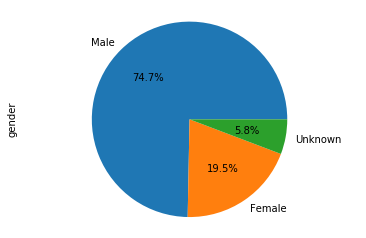

In [30]:
#NY Gender Charts
ny_df.gender.value_counts().plot(kind='pie', autopct="%1.1f%%")
plt.axis("equal")
plt.show()


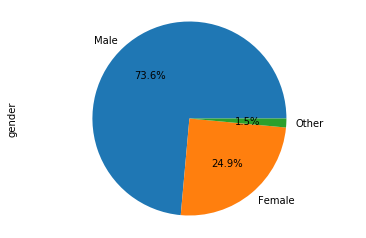

In [19]:
#SF Gender Charts
sf_df.gender.value_counts().plot(kind='pie', autopct="%1.1f%%")
plt.axis("equal")
plt.show()

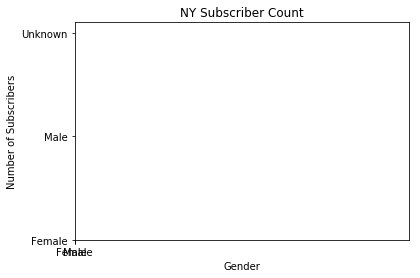

In [32]:
#NY Gender Charts
users = [ny_female_subscriber_percent, ny_male_subscriber_percent]
x_axis = np.arange(len(users))
plt.bar(len(ny_df['gender']), ny_df['gender'], color='r', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Male", "Female", "Unknown"])
plt.title("NY Subscriber Count")
plt.xlabel("Gender")
plt.ylabel("Number of Subscribers")
plt.show()

ValueError: shape mismatch: objects cannot be broadcast to a single shape

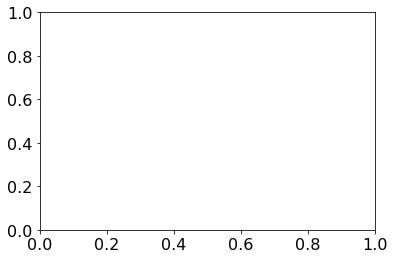

In [41]:
genders = ['Unknown', 'Male', 'Female']
y_pos = [0, 1, 2]
trip_counts = df.groupby('gender')['gender'].count()

plt.rcParams.update({'font.size': 16})
plt.barh(y_pos, trip_counts / 1000, align = 'center', alpha = 0.5, color = 'orange')
plt.yticks(y_pos, genders)
plt.xlabel('Thousands of trips')
plt.title('Distribution of trips according to user gender')
plt.show()

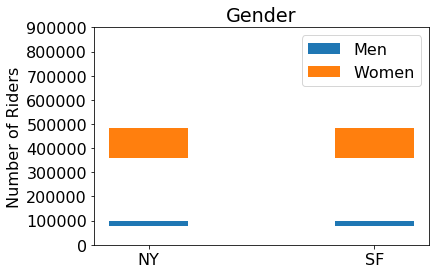

In [48]:
N = 2
ny_women = len(nyfemale_df)
ny_men = len(nymale_df)
sf_women = len(sffemale_df)
sf_men = len(sfmale_df)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, ny_women, width, bottom=ny_men)
p2 = plt.bar(ind, sf_women, width, bottom=sf_men)

plt.ylabel('Number of Riders')
plt.title('Gender')
plt.xticks(ind, ('NY', 'SF'))
plt.yticks(np.arange(0, 1000000, 100000))
plt.legend((p1[0], p2[0]), ('Men', 'Women'))

plt.show()

In [52]:
stations = ny_df['start station name'].value_counts().sort_values(ascending=0)[:10]
gender = ny_df['gender']

plt.bar(stations, gender, color='r', alpha=0.5, align="center")
plt.title("Gender per Station")
plt.xlabel("Start Station")
plt.ylabel("Number of Riders")
plt.show()

ValueError: ascending must be boolean